* This is traning to predict trend N days forward in linear manner. We predicting linear trend slope 20 days ahead and train on "y=20 day linear regression ahead".  
* See LSTM_TRAIN_LSTM_price.ipynb for 1 day price preds.

In [1]:
import logging
import tensorflow as tf

from src.common.logs import setup_logging
from src.models_service.models_service import TensorflowModelTuningService as TFMTS
from env import Env


logger = setup_logging(logger_name=__name__,
                        console_level=logging.INFO, 
                        log_file_level=logging.INFO)

config = {
    'AV': {
        'key': '',
        'ticker': 'VGT',
        'outputsize': 'full',
        'key_adjusted_close': 'Adj Close',
        'key_volume': 'Volume',
    },
    'data': {
        'test_size': 0.05,
    }, 
    'model': {
        'name': 'LSTM_trend',
        'type': 'trend',
        'trend_prediction_window': 20,
        'window': [20, 40, 60, 125],
        'shuffle_buffer_size' : [1], # In % from dataset len. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
        'batch_size' : [32, 64, 128, 256],
        'epochs' : [1500],
# ----------------------------------
        'optimizer': 'adam',
        'loss': 'huber_loss',
        'metrics': ['mae', 'mse'],
    },
    'plots': {
        'loss_zoom': 0.9,
        'show': False,
        'buy_sell_signal': False,
    },
}

2023-11-20 05:58:12.244763: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 05:58:12.244847: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 05:58:12.244882: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 05:58:12.253164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Grig Search

* When we traine model it is trained on yesterdays (close-1) data to predict todays close.  
In reality we use training data which is  some time in the past. But the idea is the same:   

<center><b> We use (-1t) features to train (0t) Closing Price. </b></center>

* Then we predict Todays close price using yesterdays data.  
* This means on the chart which we see and use in files PREDICT_LSTM_NFeatures.ipynb and _TRAIN_LSTM_NFeatures.ipynb and saved pictures we use yesturday's data to predict todays close price and plotting todays close price and prediction.   
<center><b>  BUT FEATURES FROM TODAY ARE NOT USED IN PREDICTION </b></center>

* So we can use today's closing data to predict tomorrows close price. That is what we do int app.py. We don't shift data since we don;t need to train model. We just data as is meaning today's input predicts tomorrows close price - (t0) predicts (t1).

2023-11-20 05:58:15.489395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-20 05:58:15.493840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-20 05:58:15.493883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-20 05:58:15.495607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-20 05:58:15.495691: I tensorflow/compile

Epoch 1/1500


2023-11-20 05:58:30.759787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-20 05:58:32.150746: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f96f80a3430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-20 05:58:32.150799: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-11-20 05:58:32.168497: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-20 05:58:32.314296: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


147/147 [==============================] - 8s 15ms/step - loss: 0.1994 - mae: 0.5590 - mse: 0.4006
Epoch 2/1500


2023-11-20 05:58:34.968088: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15635176933319061138
2023-11-20 05:58:34.968178: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10190087809465812997


147/147 [==============================] - 3s 14ms/step - loss: 0.1965 - mae: 0.5538 - mse: 0.3948
Epoch 3/1500
147/147 [==============================] - 3s 14ms/step - loss: 0.1962 - mae: 0.5532 - mse: 0.3942
Epoch 4/1500
147/147 [==============================] - 3s 14ms/step - loss: 0.1948 - mae: 0.5497 - mse: 0.3915
Epoch 5/1500
147/147 [==============================] - 3s 14ms/step - loss: 0.1950 - mae: 0.5506 - mse: 0.3918
Epoch 6/1500
147/147 [==============================] - 3s 14ms/step - loss: 0.1954 - mae: 0.5511 - mse: 0.3925
Epoch 7/1500
147/147 [==============================] - 3s 15ms/step - loss: 0.1949 - mae: 0.5492 - mse: 0.3915
Epoch 8/1500
147/147 [==============================] - 3s 15ms/step - loss: 0.1942 - mae: 0.5482 - mse: 0.3902
Epoch 9/1500
147/147 [==============================] - 3s 15ms/step - loss: 0.1939 - mae: 0.5485 - mse: 0.3895
Epoch 10/1500
147/147 [==============================] - 3s 14ms/step - loss: 0.1927 - mae: 0.5461 - mse: 0.3873
Epoc

2023-11-20 06:13:04 - plots - INFO - Plot "Loss-VGT_LSTM_trend_trend20_W20_SBS1_B32_E1500_P42625_2023_11_20__05_58.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_trend_trend20_W20_SBS1_B32_E1500_P42625_2023_11_20__05_58.png"
2023-11-20 06:13:05 - models_service - INFO - Model saved as VGT_LSTM_trend_trend20_W20_SBS1_B32_E1500_P42625_2023_11_20__05_58.keras
2023-11-20 06:13:05 - models_service - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_trend_trend20_W20_SBS1_B32_E1500_P42625_2023_11_20__05_58_scalers.pkl"
2023-11-20 06:13:05 - models_service - INFO - ---------------------------------model_forecast() - X_df shape-------------------------------------
2023-11-20 06:13:05 - models_service - INFO - X_df.shape: (247, 4)
2023-11-20 06:13:05 - models_service - INFO - Last 2 records:
              Open   Adj Close  Volume  high-low variance
Date                                                     
2023-09-20  428.98  420.123982  404178           

228/228 [==============================] - 2s 6ms/step


2023-11-20 06:13:07.583890: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15635176933319061138
2023-11-20 06:13:07 - models_service - INFO - ------------------------model_forecast() - forecast for 2 last ---------------------------
2023-11-20 06:13:07 - models_service - INFO - (Prediction -2 - [-0.58162194])
2023-11-20 06:13:07 - models_service - INFO - (Prediction -1 - [-0.4825564])
2023-11-20 06:13:07 - models_service - INFO - Predicted shape: (228, 1)
2023-11-20 06:13:07 - models_service - INFO - ----------------------------------------------------------------------------------------------------
2023-11-20 06:13:07 - models_service - INFO - results.shape: (228,)
2023-11-20 06:13:07 - models_service - INFO - results[-3:]: [-0.5371026  -0.58162194 -0.4825564 ]
2023-11-20 06:13:07 - models_service - INFO - df_test_y.shape: (247,)
2023-11-20 06:13:07 - models_service - INFO - df_test_y.tail(3):
Date
2023-09-19    0.598891
2023-09-20

/workspaces/P7-Trading-Bot/models_trained


2023-11-20 06:13:10 - build_features - INFO - --------------------FE.create_slope_column()--------------------
2023-11-20 06:13:10 - build_features - INFO - df.shape: (4945, 6)
2023-11-20 06:13:10 - build_features - INFO - df.columns: Index(['Open', 'Adj Close', 'Volume', 'high-low variance', 'Tomorrow',
       'slope_20'],
      dtype='object')
2023-11-20 06:13:10 - models_service - INFO - df_train.shape: (4698, 6), df_test.shape: (247, 6)
2023-11-20 06:13:10 - models_service - INFO - Last record in df_train:
Open                 3.215500e+02
Adj Close            3.149712e+02
Volume               2.315876e+06
high-low variance    2.963769e+00
Tomorrow             3.186156e+02
slope_20            -1.813974e-01
Name: 2022-09-27 00:00:00, dtype: float64
2023-11-20 06:13:10 - models_service - INFO - Last record in df_test:
Open                    417.090000
Adj Close               413.158837
Volume               599944.000000
high-low variance         1.177204
Tomorrow                414.

Epoch 1/1500
74/74 [==============================] - 5s 16ms/step - loss: 0.0039 - mae: 0.0652 - mse: 0.0078
Epoch 2/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0025 - mae: 0.0535 - mse: 0.0050
Epoch 3/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0023 - mae: 0.0514 - mse: 0.0046
Epoch 4/1500
74/74 [==============================] - 2s 15ms/step - loss: 0.0028 - mae: 0.0554 - mse: 0.0056
Epoch 5/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0036 - mae: 0.0636 - mse: 0.0072
Epoch 6/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0028 - mae: 0.0569 - mse: 0.0055
Epoch 7/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0034 - mae: 0.0615 - mse: 0.0068
Epoch 8/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0031 - mae: 0.0586 - mse: 0.0062
Epoch 9/1500
74/74 [==============================] - 2s 14ms/step - loss: 0.0021 - mae: 0.0491 - mse: 0.0042
Epoch 10/1

2023-11-20 06:15:30 - plots - INFO - Plot "Loss-VGT_LSTM_trend_trend20_W20_SBS1_B64_E1500_P42625_2023_11_20__06_13.png" saved to "/workspaces/P7-Trading-Bot/figures/Loss-VGT_LSTM_trend_trend20_W20_SBS1_B64_E1500_P42625_2023_11_20__06_13.png"
2023-11-20 06:15:30 - models_service - INFO - Model saved as VGT_LSTM_trend_trend20_W20_SBS1_B64_E1500_P42625_2023_11_20__06_13.keras
2023-11-20 06:15:31 - models_service - INFO - Scalers saved: "/workspaces/P7-Trading-Bot/models_trained/VGT_LSTM_trend_trend20_W20_SBS1_B64_E1500_P42625_2023_11_20__06_13_scalers.pkl"
2023-11-20 06:15:31 - models_service - INFO - ---------------------------------model_forecast() - X_df shape-------------------------------------
2023-11-20 06:15:31 - models_service - INFO - X_df.shape: (247, 4)
2023-11-20 06:15:31 - models_service - INFO - Last 2 records:
              Open   Adj Close  Volume  high-low variance
Date                                                     
2023-09-20  428.98  420.123982  404178           

228/228 [==============================] - 2s 6ms/step


2023-11-20 06:15:33.213236: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15635176933319061138
2023-11-20 06:15:33 - models_service - INFO - ------------------------model_forecast() - forecast for 2 last ---------------------------
2023-11-20 06:15:33 - models_service - INFO - (Prediction -2 - [-0.5175777])
2023-11-20 06:15:33 - models_service - INFO - (Prediction -1 - [-0.39440522])
2023-11-20 06:15:33 - models_service - INFO - Predicted shape: (228, 1)
2023-11-20 06:15:33 - models_service - INFO - ----------------------------------------------------------------------------------------------------
2023-11-20 06:15:33 - models_service - INFO - results.shape: (228,)
2023-11-20 06:15:33 - models_service - INFO - results[-3:]: [-0.52544093 -0.5175777  -0.39440522]
2023-11-20 06:15:33 - models_service - INFO - df_test_y.shape: (247,)
2023-11-20 06:15:33 - models_service - INFO - df_test_y.tail(3):
Date
2023-09-19    0.598891
2023-09-20

/workspaces/P7-Trading-Bot/models_trained


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

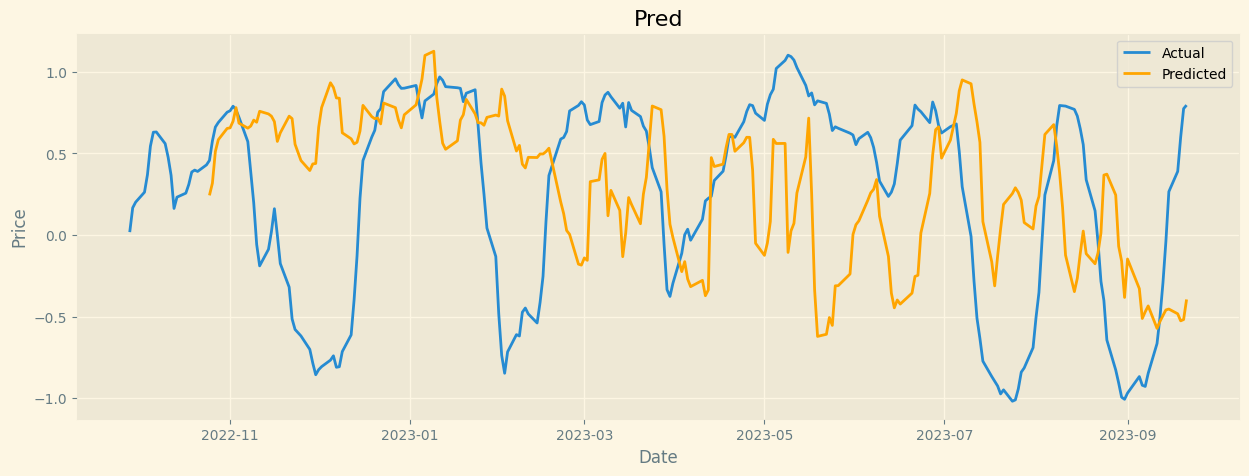

In [2]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(None, 4)), # where 2 is the number of features
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
        ]
    )

# model.save_weights(f'{Env.PROJECT_ROOT}/models_trained/keep/my_model_weights.h5')
grid_search_service = TFMTS(model, config)
grid_search_service.grid_search(logger, verbose=True)